# Locally weighted Linear Regression

--------------------------

Links for understand this topic:
* Stanford CS299: https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=5
* Towards Data Science: https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf/

**Non-Parametric** – In a Non-Parametric Algorithm, you always have to keep the data and the parameters in your computer memory to make predictions. And that’s why this type of algorithm may **not be great** if you have a really really **massive dataset**.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

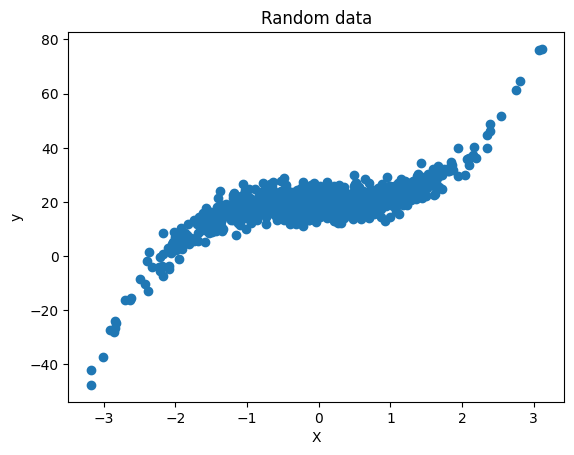

In [ ]:
X = np.random.randn(1000,1)
y = 2*(X**3) + 20 + 3.14*np.random.randn(1000,1)

plt.plot(X, y, 'o')
plt.title("Random data")
plt.xlabel("X")
plt.ylabel("y") 

plt.show()

### Weighting function

In [17]:
# Weight Matrix in code. It is a diagonal matrix.

def wm(point, X, tau):
    # tau --> bandwidth
    # X --> Training data.
    # point --> the x where we want to make the prediction.
    
    # m is the No of training examples
    m = X.shape[0]
    
    # Initialising W as an identity matrix.
    w = np.asmatrix(np.eye(m)) 
    
    # Calculating weights for all training examples [x(i)'s].
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i,i] = np.exp(np.dot((xi-point), (xi-point).T)/d)
    
    return w

In [18]:
def predict(X, y, point, tau):
    m = X.shape[0]
    
    # Appending a cloumn of ones in X to add the bias term.
    # Just one parameter: theta, that's why adding a column of ones        
    # to X and also adding a 1 for the point where we want to predict. 
    
    X_ = np.append(X, np.ones(m).reshape(m, 1), axis=1)
    
    # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
    w = wm(point_, X_, tau)
    
    # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))
    
    pred = np.dot(point_, theta)
    
    return theta, pred

In [19]:
def plot_predictions(X, y, tau, nval):
    X_test = np.linspace(-3, 3, nval) 
    
    preds = []
    
    for point in X_test:
        theta, pred = predict(X, y, point, tau)
        preds.append(pred)
        
    X_test = np.array(X_test).reshape(nval, 1)
    preds = np.array(preds).reshape(nval, 1)
    
    # plot
    plt.plot(X, y, 'o', color='blue')
    plt.plot(X_test, preds, 'o', color='red')
    plt.show

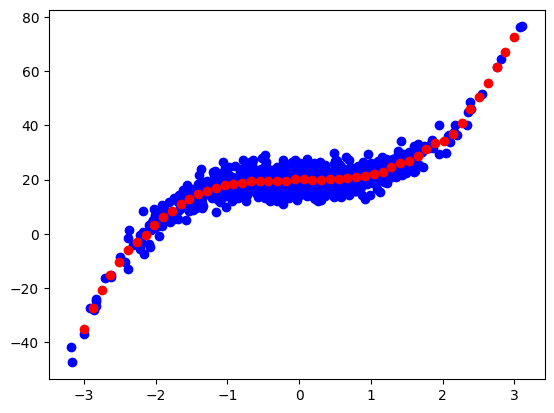

In [27]:
plot_predictions(X, y, 0.08, 50)

Our task is choose correct **tau**. Because if we use **too large** value for tau, the algorith gives large weights for distant points, than our line will be **straight**. But if we use **too small** value than as if our single line breaks into **too many coordinates** and our line will **not be a single line**.

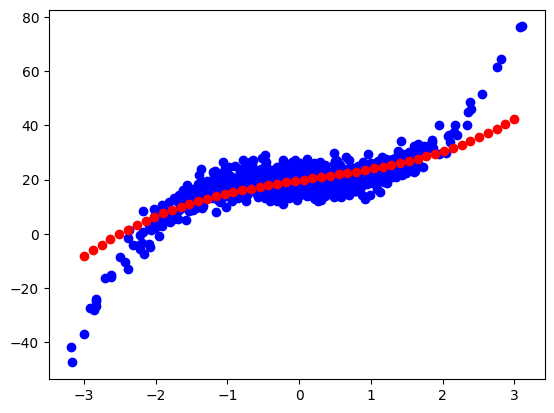

In [29]:
plot_predictions(X, y, 1.5, 50)

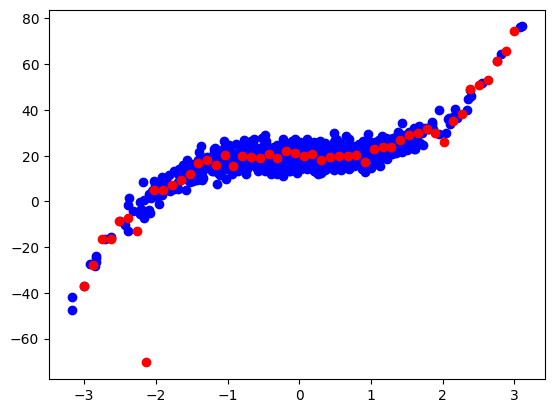

In [32]:
plot_predictions(X, y, 0.008, 50)

##### **I noticed that by weighted function we give 0 and 1 for the points of main data, and by that we filter the data for include to training set and train Simple Linear Regression Model.**